<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%93%D0%B5%D0%B9%D0%BC%D1%81-%D0%A5%D0%B0%D1%83%D1%8D%D0%BB%D0%BB%20%D0%B4%D0%BB%D1%8F%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0%20%D0%BC%D0%BE%D1%80%D1%84%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import glob
import re
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Считываем словарь морфем
dictionary_file = "tihonov (2).txt"
morpheme_dictionary = {}
with open(dictionary_file, 'r', encoding='utf-8') as dict_file:
    for line in dict_file:
        line = line.strip()
        if line:
            word, morphemes = line.split('\t')
            morpheme_count = morphemes.count('/')
            morpheme_dictionary[word.lower()] = morpheme_count

# Список для хранения данных
data = []

# Список для хранения среднего количества морфем в каждом файле
avg_morpheme_counts_all = []

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    avg_morpheme_counts = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = re.findall(r'\b\w+\b', text)

            total_morpheme_count = 0
            token_count = 0

            # Вычисляем количество морфем для каждого токена
            for token in tokens:
                # Приводим токен к нижнему регистру
                token = token.lower()

                # Проверяем наличие токена в словаре морфем
                if token in morpheme_dictionary:
                    morpheme_count = morpheme_dictionary[token]
                    total_morpheme_count += morpheme_count
                    token_count += 1

            # Среднее количество морфем для файла
            avg_morpheme_count = total_morpheme_count / token_count if token_count > 0 else 0
            avg_morpheme_counts.append(avg_morpheme_count)

            # Добавляем данные в список для анализа
            data.append((cefr_level, avg_morpheme_count))

    # Добавляем средние значения в общий список
    avg_morpheme_counts_all.extend(avg_morpheme_counts)

# Вычисляем статистики для количества морфем во всех файлах
mean_morpheme_count_all = np.mean(avg_morpheme_counts_all)
sd_morpheme_count_all = np.std(avg_morpheme_counts_all)
std_error_morpheme_count_all = stats.sem(avg_morpheme_counts_all)
ci_morpheme_count_all = stats.t.interval(0.95, len(avg_morpheme_counts_all) - 1, loc=mean_morpheme_count_all, scale=std_error_morpheme_count_all)

# Выводим статистики для количества морфем во всех файлах
print("Статистики для количества морфем во всех файлах:")
print(f"Mean: {mean_morpheme_count_all}")
print(f"SD: {sd_morpheme_count_all}")
print(f"Std. Error: {std_error_morpheme_count_all}")
print(f"95% CI (confidence interval) (mean): {ci_morpheme_count_all}")

# Создаем DataFrame
df = pd.DataFrame(data, columns=['CEFR Level', 'Avg Morpheme Count'])

# ANOVA
anova_result = pg.anova(data=df, dv='Avg Morpheme Count', between='CEFR Level')

# Тест Геймса-Хауэлла
games_howell_result = pg.pairwise_gameshowell(data=df, dv='Avg Morpheme Count', between='CEFR Level')

# Вывод результатов
print(f"F-статистика (ANOVA): {anova_result['F'][0]}")
print(f"p-value (ANOVA): {anova_result['p-unc'][0]}")

print("\nGames-Howell Test Results:")
print(games_howell_result)

Статистики для количества морфем во всех файлах:
Mean: 1.706527605929558
SD: 0.18319354800256715
Std. Error: 0.005533563485194656
95% CI (confidence interval) (mean): (1.6956700304861412, 1.7173851813729748)
F-статистика (ANOVA): 3.942373074941028
p-value (ANOVA): 0.008217994311889135

Games-Howell Test Results:
    A   B   mean(A)   mean(B)      diff        se         T          df  \
0  A1  A2  1.685370  1.690116 -0.004746  0.034382 -0.138051   72.198573   
1  A1  B1  1.685370  1.713256 -0.027886  0.033987 -0.820483   68.976822   
2  A1  B2  1.685370  1.748778 -0.063408  0.035150 -1.803947   78.304538   
3  A2  B1  1.690116  1.713256 -0.023140  0.012139 -1.906220  864.170051   
4  A2  B2  1.690116  1.748778 -0.058661  0.015090 -3.887385  297.708299   
5  B1  B2  1.713256  1.748778 -0.035522  0.014169 -2.507078  244.937887   

       pval    hedges  
0  0.999052 -0.023124  
1  0.844588 -0.153293  
2  0.279260 -0.338970  
3  0.226116 -0.127209  
4  0.000718 -0.319471  
5  0.061292 -0.2

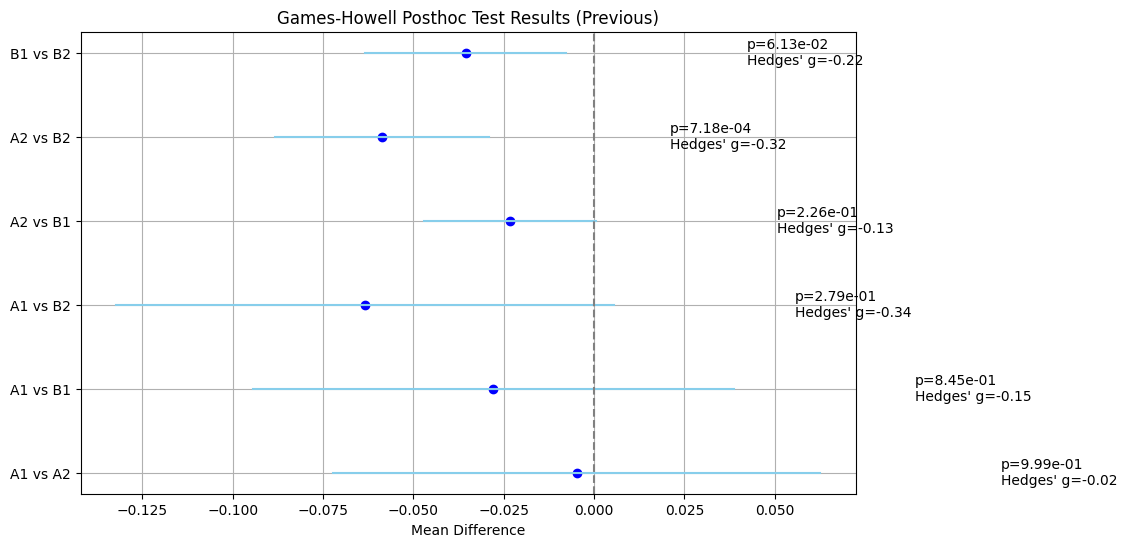

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Результаты теста Геймса-Хауэла
games_howell_result_previous = pd.DataFrame({
    'A': ['A1', 'A1', 'A1', 'A2', 'A2', 'B1'],
    'B': ['A2', 'B1', 'B2', 'B1', 'B2', 'B2'],
    'mean(A)': [1.685370, 1.685370, 1.685370, 1.690116, 1.690116, 1.713256],
    'mean(B)': [1.690116, 1.713256, 1.748778, 1.713256, 1.748778, 1.748778],
    'diff': [-0.004746, -0.027886, -0.063408, -0.023140, -0.058661, -0.035522],
    'se': [0.034382, 0.033987, 0.035150, 0.012139, 0.015090, 0.014169],
    'T': [-0.138051, -0.820483, -1.803947, -1.906220, -3.887385, -2.507078],
    'df': [72.198573, 68.976822, 78.304538, 864.170051, 297.708299, 244.937887],
    'pval': [0.999052, 0.844588, 0.279260, 0.226116, 0.000718, 0.061292],
    'hedges': [-0.023124, -0.153293, -0.338970, -0.127209, -0.319471, -0.219895]
})

# Расчет доверительных интервалов
z_score = 1.96
conf_intervals_previous = [
    (md - z_score * s, md + z_score * s) for md, s in zip(games_howell_result_previous['diff'], games_howell_result_previous['se'])
]

# Построение графика
plt.figure(figsize=(10, 6))
for i, (group, ci, p, h) in enumerate(
    zip(games_howell_result_previous['A'] + ' vs ' + games_howell_result_previous['B'], conf_intervals_previous, games_howell_result_previous['pval'], games_howell_result_previous['hedges'])
):
    plt.plot(ci, [i, i], color="skyblue")
    plt.scatter(games_howell_result_previous['diff'].iloc[i], i, color="blue")
    plt.text(ci[1] + 0.05, i, f"p={p:.2e}\nHedges' g={h:.2f}", va='center')

# Элементы оформления
plt.yticks(range(len(games_howell_result_previous)), games_howell_result_previous['A'] + ' vs ' + games_howell_result_previous['B'])
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel("Mean Difference")
plt.title("Games-Howell Posthoc Test Results (Previous)")
plt.grid(True)
plt.show()